In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fn = "../input/wikipedia_edits.csv.zip"
df = pd.read_csv(fn)

In [2]:
len(df)

789343

In [3]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10T02:52:25Z,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09T13:11:00Z,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08T21:46:42Z,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08T21:39:37Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08T21:38:24Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [5]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


In [11]:
df["date"] = df["timestamp"].dt.date

In [12]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0,2018-09-10
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0,2018-09-09
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0,2018-09-08
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08


In [17]:
title = "Manny_Pacquiao"
df_sub = df[df["title"]==title]

In [18]:
len(df_sub)

8917

In [19]:
df_sub.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
477505,Manny_Pacquiao,858923775,858924908,2018-09-10 15:07:25+00:00,MroWikipedian,34478357.0,96240,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10
477506,Manny_Pacquiao,858393401,858923775,2018-09-10 14:57:58+00:00,MroWikipedian,34478357.0,95925,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10
477507,Manny_Pacquiao,858392991,858393401,2018-09-06 21:20:17+00:00,Tbb 911,7097402.0,95879,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06
477508,Manny_Pacquiao,858165549,858392991,2018-09-06 21:16:11+00:00,Tbb 911,7097402.0,95954,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06
477509,Manny_Pacquiao,858165135,858165549,2018-09-05 14:23:28+00:00,PinoyBoxing11,15621670.0,95951,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-05


In [20]:
date_min = df_sub["date"].min()
date_max = df_sub["date"].max()

In [21]:
date_min, date_max

(datetime.date(2004, 8, 20), datetime.date(2018, 9, 10))

In [22]:
"Date range: {:%m/%d/%Y} to {:%m/%d/%Y}".format(date_min, date_max)

'Date range: 08/20/2004 to 09/10/2018'

In [23]:
df_daily = df_sub.groupby("date")["revid"].agg([len])

In [24]:
df_daily.head()

,len
date,
2004-08-20,5
2004-09-06,4
2004-09-12,1
2004-10-14,1
2004-10-22,1


In [25]:
x = df_daily.index

In [26]:
y = df_daily["len"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


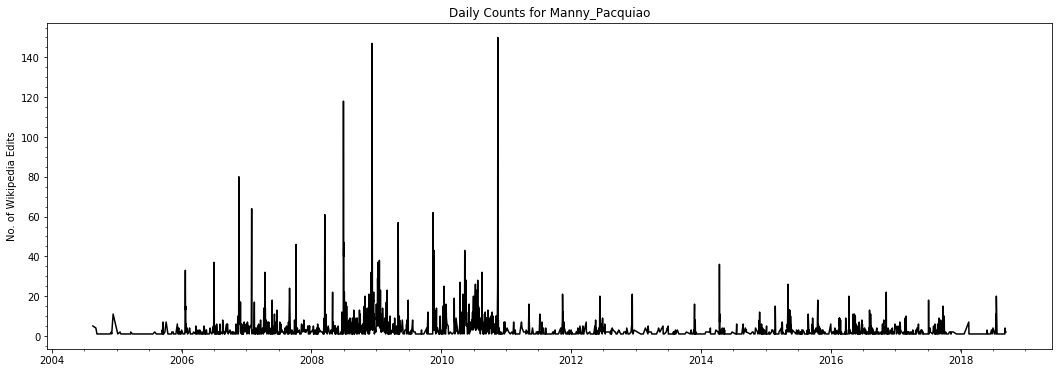

In [27]:
plt.figure(figsize=(18, 6))
plt.plot(x,y, color="black")
plt.ylabel("No. of Wikipedia Edits")
plt.title("Daily Counts for %s" % title)
plt.minorticks_on()

In [28]:
df_MP = df[df['title'] == "Manny_Pacquiao"]
df_FM = df[df['title'] == "Floyd_Mayweather_Jr."]

In [29]:
df_daily_MP = df_MP.groupby("date")["revid"].agg([len])
df_daily_FM = df_FM.groupby("date")["revid"].agg([len])

In [30]:
x_MP = df_daily_MP.index
x_FM = df_daily_FM.index

In [31]:
x_MP = df_daily_MP["len"]
x_FM = df_daily_FM["len"]

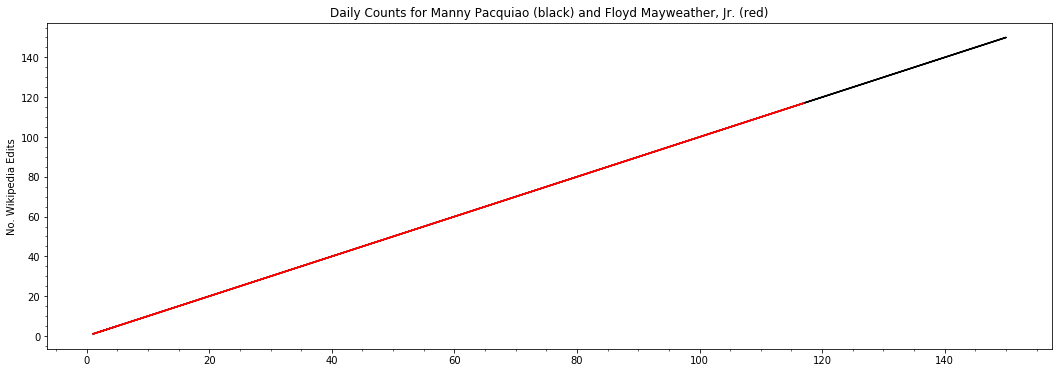

In [32]:
plt.figure(figsize=(18, 6))
plt.plot(x_MP, x_MP, color="black")
plt.plot(x_FM, x_FM, color="red")
plt.ylabel("No. Wikipedia Edits")
plt.title("Daily Counts for Manny Pacquiao (black) and Floyd Mayweather, Jr. (red)")
plt.minorticks_on()